# KNN Shapley

In [1]:
%load_ext autoreload

In [2]:
%autoreload
import os
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

from valuation.shapley.knn import exact_knn_shapley
from valuation.utils import Dataset

In [3]:
# Add path to notebooks directory to be able to import from plots.py
# First one is needed when running the notebook directly
sys.path.insert(0, os.fspath(Path(".").resolve()))
# Second one is needed when testing the notebook 
sys.path.insert(0, os.fspath(Path(".").resolve() / "notebooks"))

In [4]:
%autoreload
from plots import plot_iris

In [5]:
data = Dataset.from_sklearn(datasets.load_iris())

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
values = exact_knn_shapley(data, knn)

0it [00:00, ?it/s]

In [7]:
effective = [k for k,v in values.items() if abs(v) > 0.]
values = np.array([values[k] for k in effective])

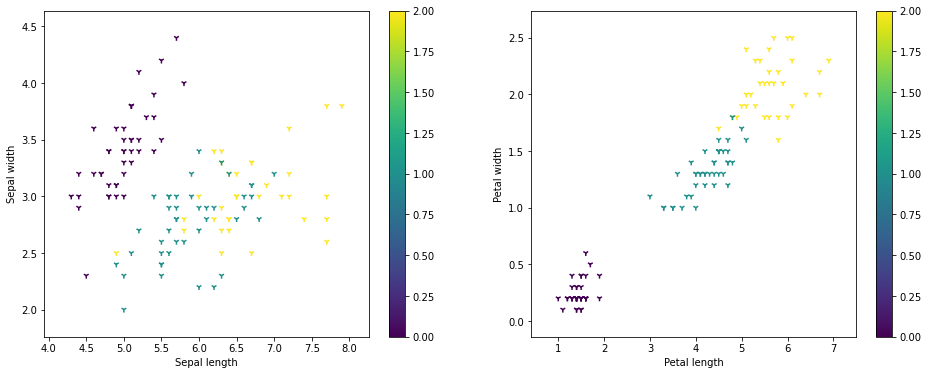

In [8]:
plot_iris(data)

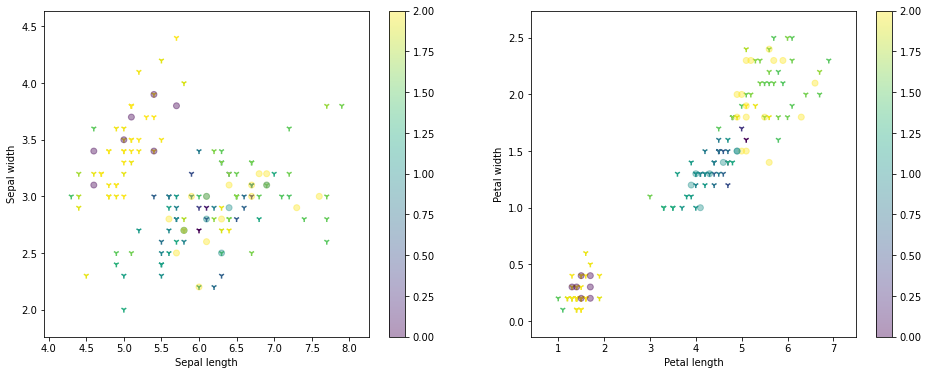

In [9]:
plot_iris(data, effective, values, plot_test=True)